## Problem Statement ##

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
#import the libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### Understanding the data

In [2]:
# Read the file

df_housing = pd.read_csv("train.csv")

df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#understand the data
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# checking statistical summary of numerical columns
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Checking for the null values


df_housing.isnull().sum()



Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## Checking for missing values

In [6]:
null_val = pd.DataFrame(round(df_housing.isnull().sum()/len(df_housing.index)*100,2).sort_values(ascending=False),columns=["Null Values %"])
null_val.index.name = 'Predictors'
null_val.head()

,Null Values %
Predictors,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26


In [7]:
null_df = null_val[null_val["Null Values %"] > 0]
null_df

,Null Values %
Predictors,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [8]:
# Dropping predictors PoolQC, Miscfeature, Alley, Fence as more than 80 % values are null


df_housing = df_housing.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1)

In [9]:
# Checking dataframe after dropping the columns for missing values

df_housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [10]:
# Check for duplicate data
dups = df_housing.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_housing[dups]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## Target Feature : Saleprice

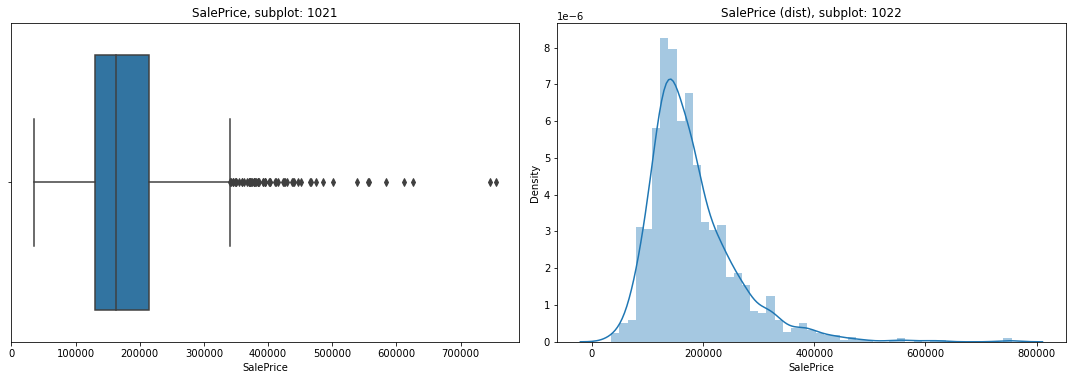

In [11]:
target_col = ['SalePrice']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df_housing[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df_housing[i])
    c = c + 1
    
   

plt.tight_layout()
plt.show();

Observations - Target variable contains outliers in the data also it is right skewed - not normally distributed. We will take log transformation on our target variable

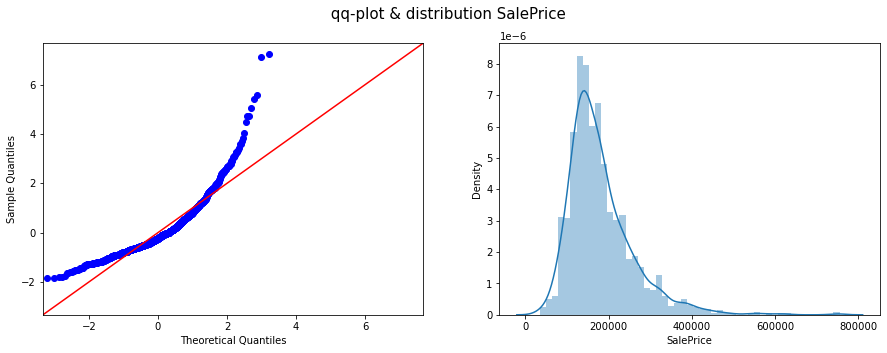

In [12]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df_housing['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

sns.distplot(df_housing['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

In [13]:
df_housing['SalePrice_log'] = np.log(df_housing['SalePrice'])

In [14]:
saleprice = df_housing[['SalePrice']].copy()
df_housing = df_housing.drop('SalePrice',axis=1) # removing the orignal variable

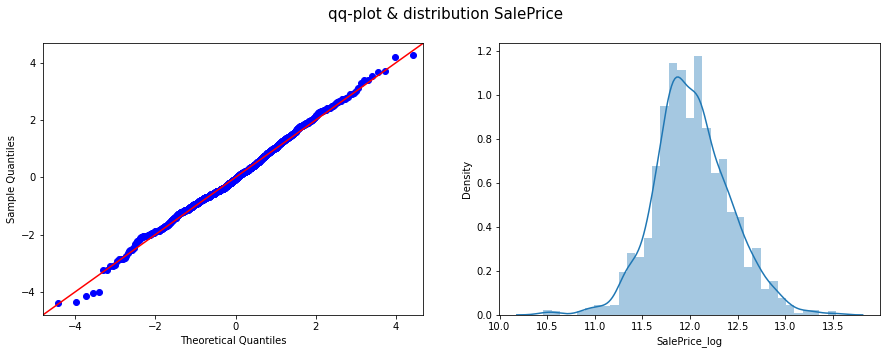

In [15]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(df_housing['SalePrice_log'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(df_housing['SalePrice_log'] , kde = True, hist=True, ax = ax[1])
plt.show()

After treating the right skewness of the target variable re-plotting to check the target variable

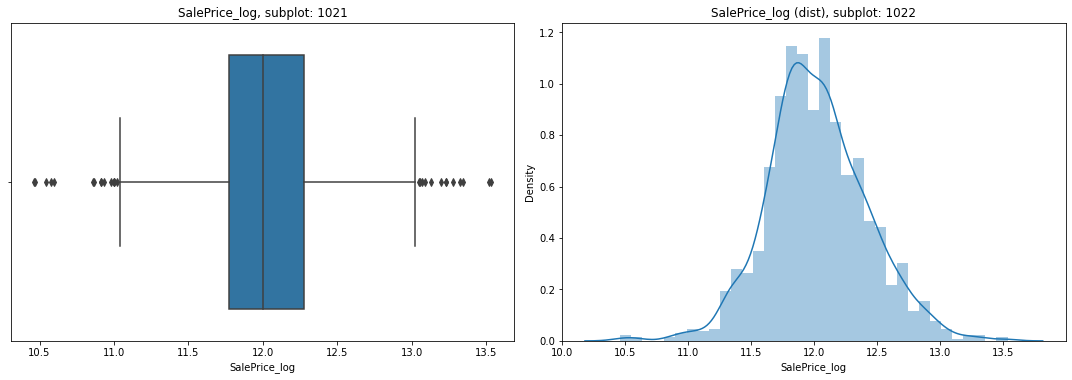

In [16]:
target_col = ['SalePrice_log']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(df_housing[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(df_housing[i])
    c = c + 1
    
   

plt.tight_layout()
plt.show();

## Outliers Detection

In [17]:
num_col = df_housing.select_dtypes(include=np.number).columns.tolist()
num_data = df_housing[num_col]
print(num_data.shape)
print(num_data.columns.tolist())


(1460, 38)
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice_log']


In [18]:
#checkign the numerical dataset

num_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,12.429216


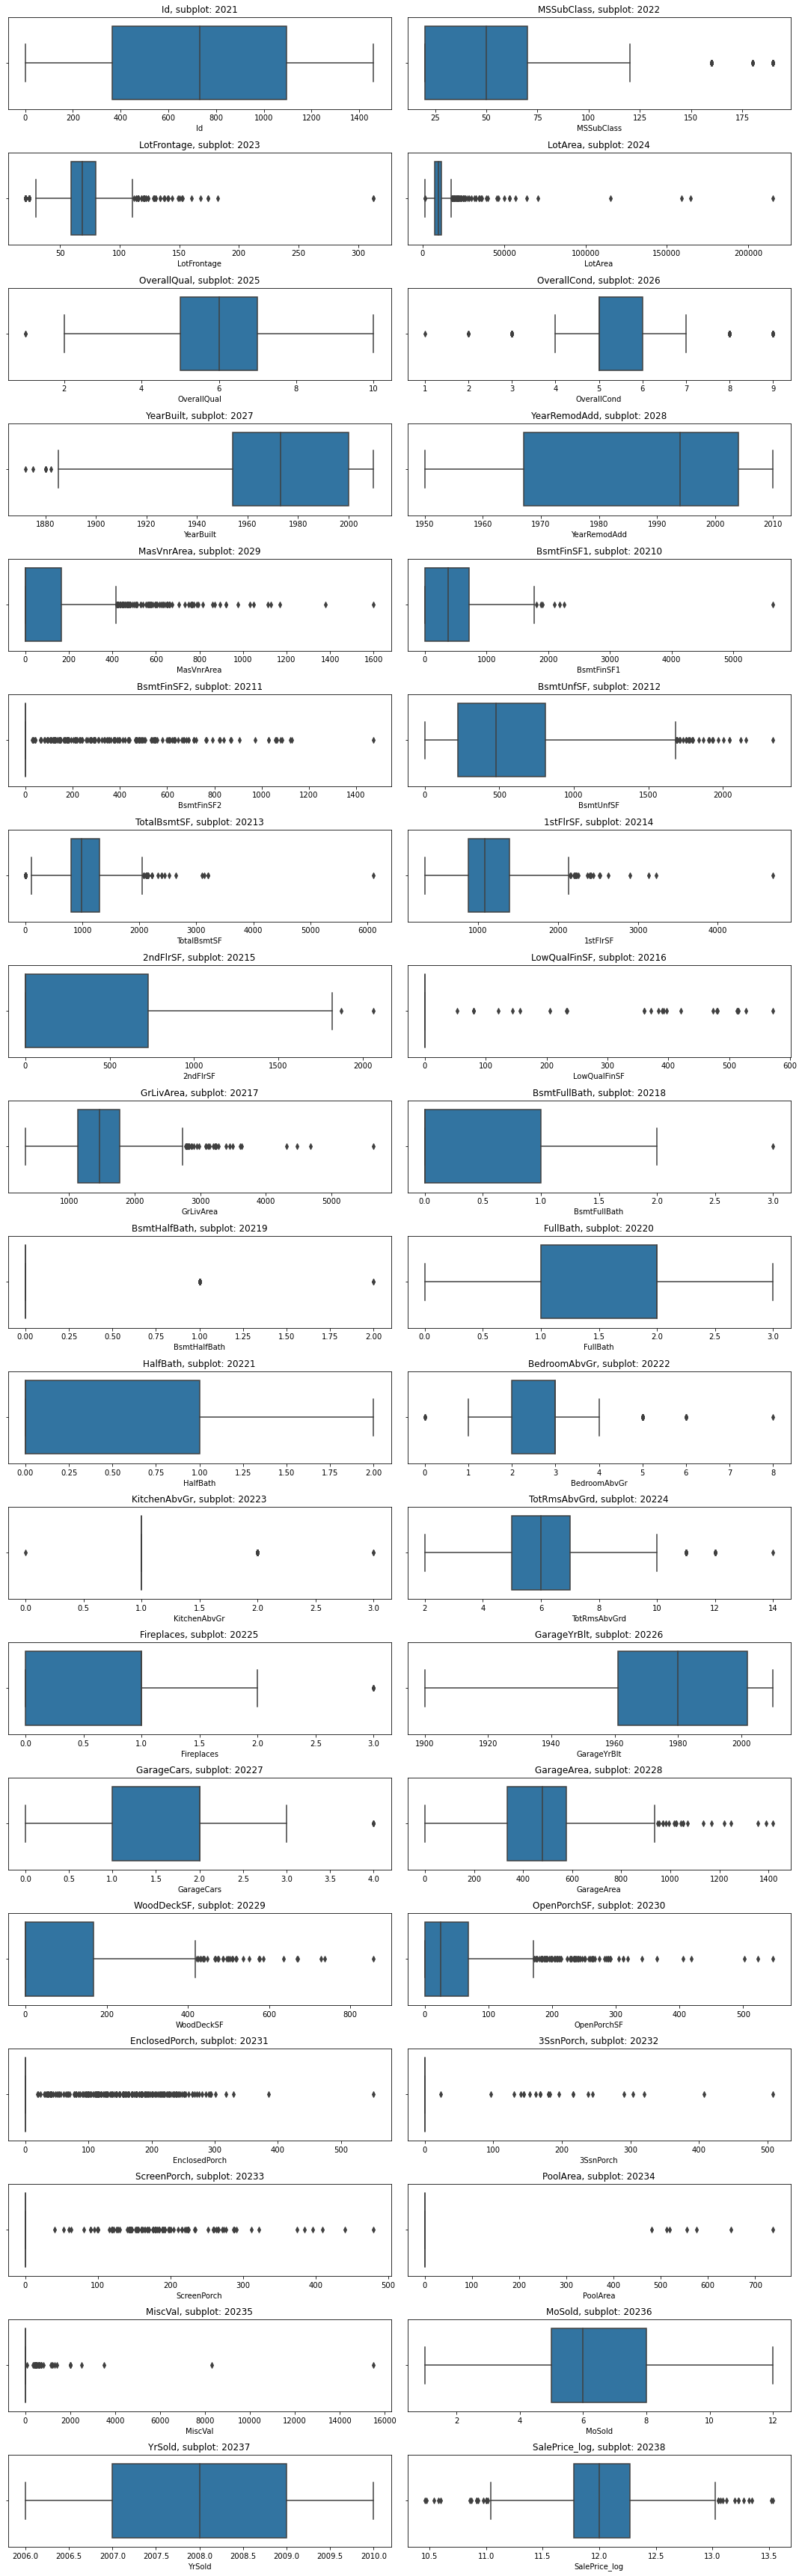

In [19]:
a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

In [20]:
Q1 = num_data.quantile(0.05)
Q3 = num_data.quantile(0.95)

IQR = Q3 - Q1

num_dat = num_data[~((num_data < (Q1 - 1.5 * IQR)) |(num_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [21]:
num_data.info

<bound method DataFrame.info of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0    

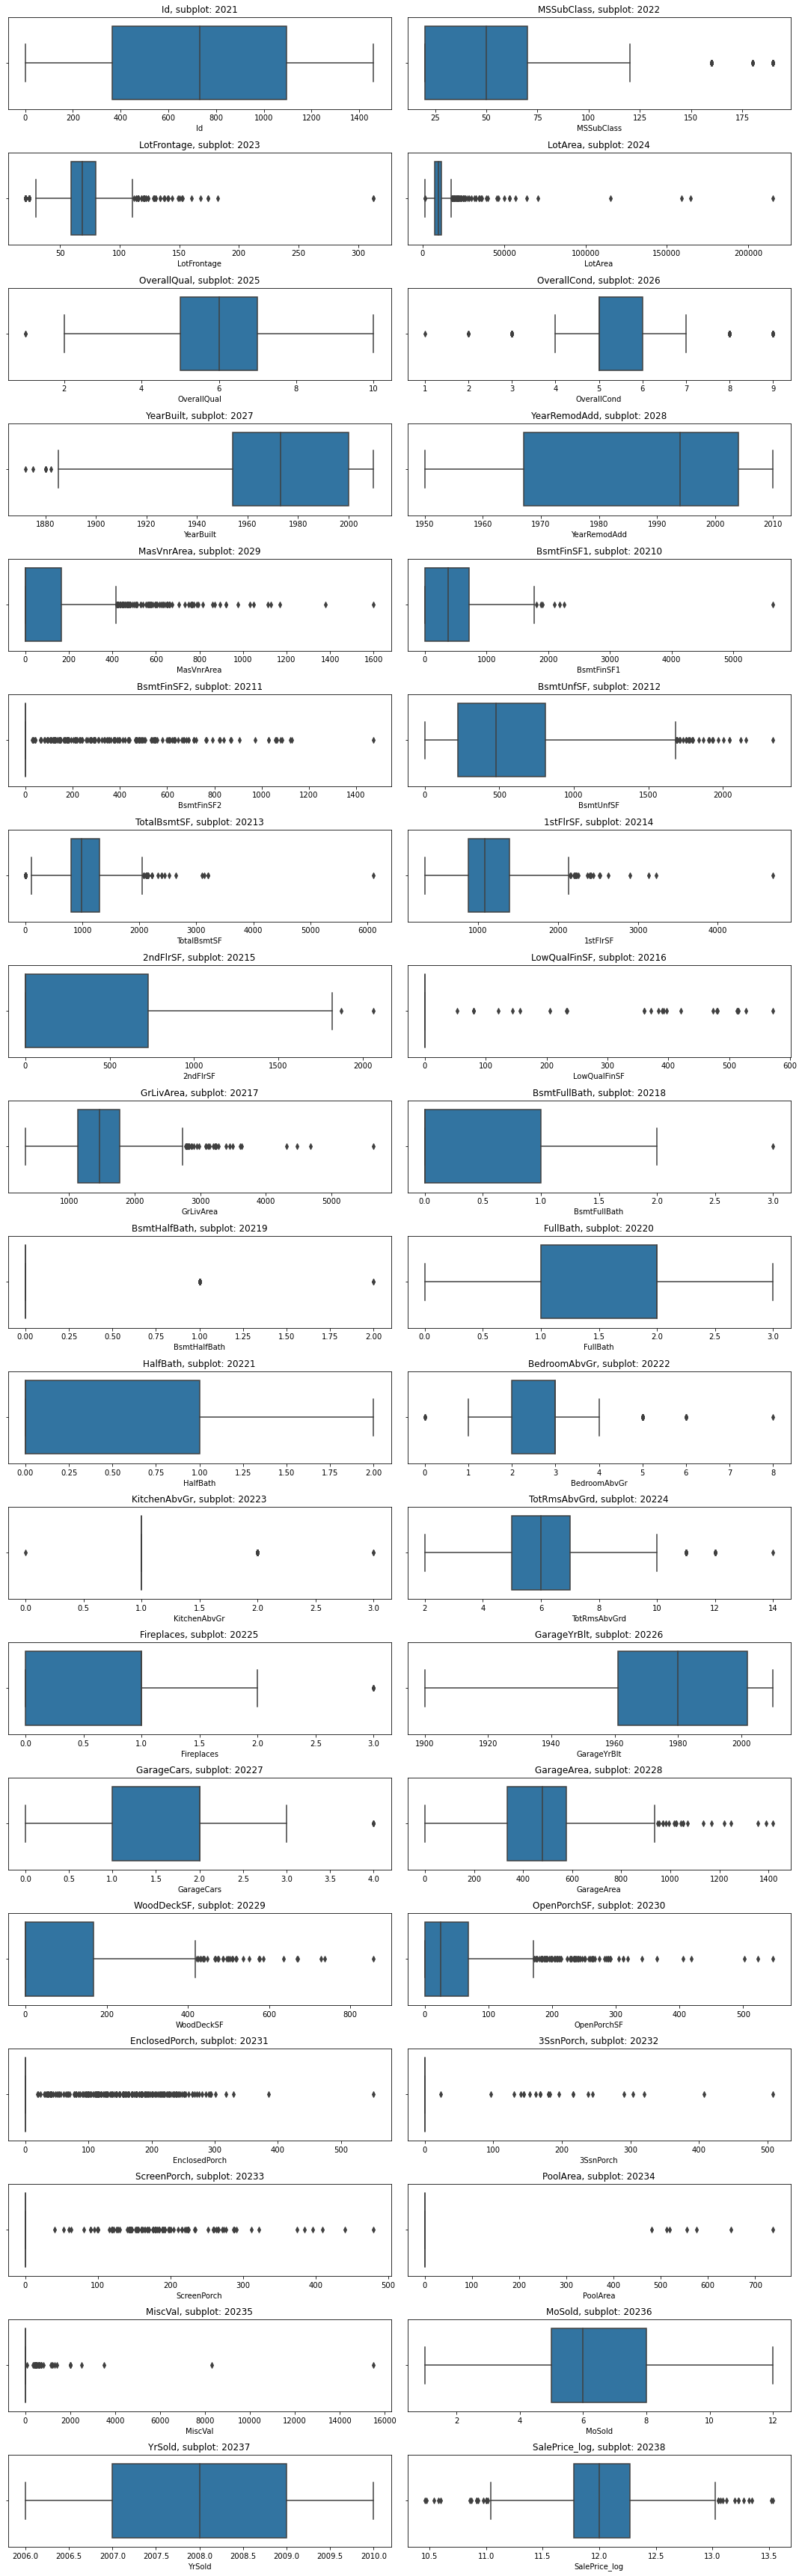

In [22]:
#  Plotting graphs after removing outliers

a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(num_data[i])
    c = c + 1

    plt.tight_layout()
plt.show();

## Treat Missing Values ##

In [23]:
    num_data.isnull().sum().sort_values(ascending=False)[:10]

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
OpenPorchSF       0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
dtype: int64

### Replacing the missing values with median

Replacing with median as there are outliers present in the data

In [24]:
# Importing the SimpleImputer class 
from sklearn.impute import SimpleImputer

In [25]:
imputer = SimpleImputer(missing_values = np.nan,strategy ='median')

In [26]:
num_data['LotFrontage'] = imputer.fit_transform(num_data[['LotFrontage']].copy()).ravel()
num_data['GarageYrBlt'] = imputer.fit_transform(num_data[['GarageYrBlt']].copy()).ravel()
num_data['MasVnrArea'] = imputer.fit_transform(num_data[['MasVnrArea']].copy()).ravel()

In [27]:
num_data.isnull().sum().sort_values(ascending=False)

Id               0
WoodDeckSF       0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
OpenPorchSF      0
MSSubClass       0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
SalePrice_log    0
dtype: int64

In [28]:
# checking the numerical variable dataset shape
num_data.shape

(1460, 38)

<AxesSubplot:>

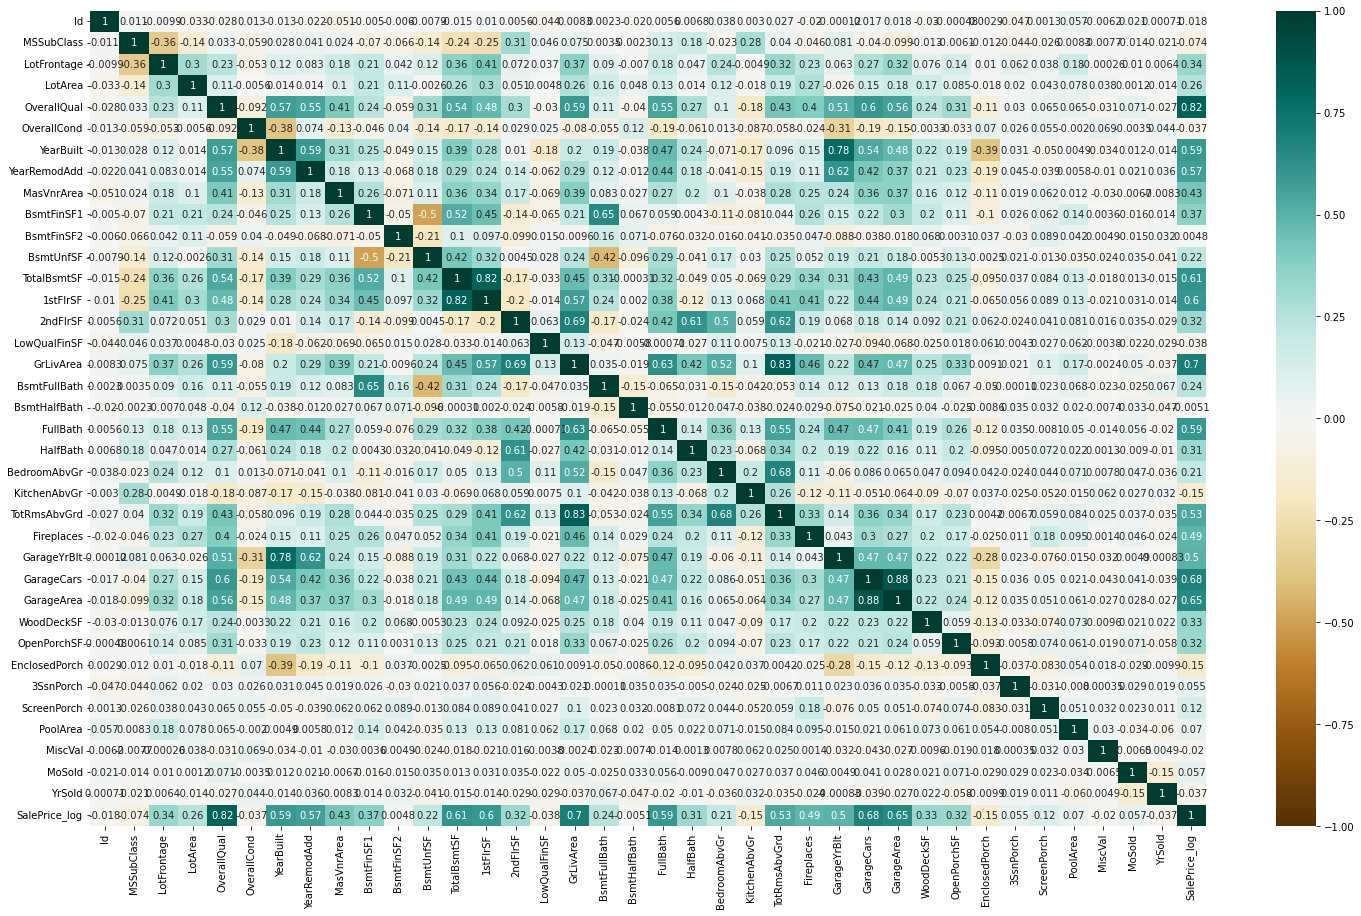

In [29]:
# plotting the heatmap of the numerical variable

plt.figure(figsize=(25, 15))

sns.heatmap(num_data.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

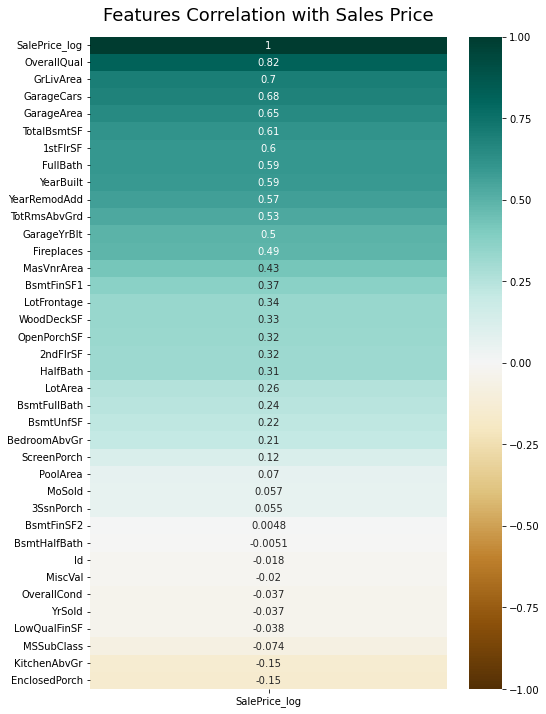

In [30]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(num_data.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlation with Sales Price', fontdict={'fontsize':18}, pad=16);

Taking feature which are positively correlated with Salespric

In [31]:
num_corr_data = num_data.corr()
top_corr_num_col = num_corr_data.index[abs(num_corr_data['SalePrice_log'])>0]
top_corr_num_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice_log'],
      dtype='object')

In [32]:
num_data_f = num_data[top_corr_num_col]
num_data_f.shape

(1460, 38)

<AxesSubplot:>

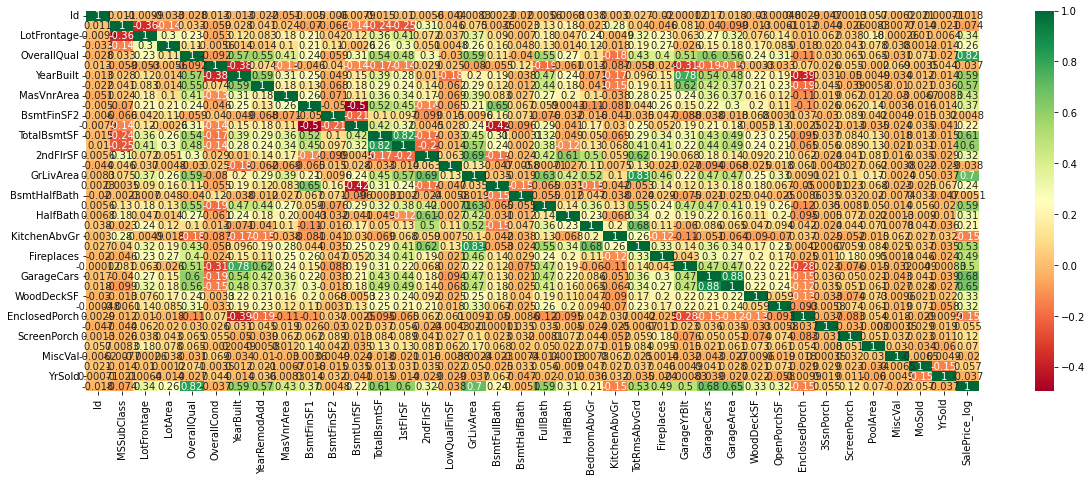

In [33]:
plt.figure(figsize=(20,7))
sns.heatmap(num_data_f.corr(),annot=True,cmap="RdYlGn")

## Treating Catogorical variables

In [34]:
cat_col = df_housing.select_dtypes(include=object).columns.tolist()
cat_col

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [35]:
cat_df = df_housing[cat_col]
cat_df.shape

(1460, 39)

In [36]:
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [37]:
# checkign null values in categorical variables

cat_df.isnull().sum().sort_values(ascending=False)

FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
Electrical         1
Heating            0
MSZoning           0
HeatingQC          0
CentralAir         0
Functional         0
PavedDrive         0
SaleType           0
KitchenQual        0
Foundation         0
Street             0
ExterCond          0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
ExterQual          0
SaleCondition      0
dtype: int64

As per the data dictionary missing values is actually representing absense of the feature. Imputing the same for missing values in the categorical variables

In [38]:
cat_df['FireplaceQu'] = cat_df['FireplaceQu'].fillna('No Fireplace')
cat_df['GarageCond'] = cat_df['GarageCond'].fillna('No Garage')
cat_df['GarageQual'] = cat_df['GarageQual'].fillna('No Garage')
cat_df['GarageFinish'] = cat_df['GarageFinish'].fillna('No Garage')
cat_df['GarageType'] = cat_df['GarageType'].fillna('No Garage')

In [39]:
cat_df['BsmtExposure'] = cat_df['BsmtExposure'].fillna('No Basement')
cat_df['BsmtFinType2'] = cat_df['BsmtFinType2'].fillna('No Basement')
cat_df['BsmtCond']     = cat_df['BsmtCond'].fillna('No Basement')
cat_df['BsmtFinType1']     = cat_df['BsmtFinType1'].fillna('No Basement')
cat_df['BsmtQual'] = cat_df['BsmtQual'].fillna('No Basement')

In [40]:
cat_df['MasVnrType'] = cat_df['MasVnrType'].fillna('None')
cat_df['Electrical'] = cat_df['Electrical'].fillna('None')

In [41]:
#Checking the categorical dataset after treating missing values

cat_df.isnull().sum().sort_values(ascending=False)

MSZoning         0
KitchenQual      0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
Functional       0
BsmtQual         0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtCond         0
Foundation       0
Street           0
Condition2       0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
BldgType         0
ExterCond        0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
SaleCondition    0
dtype: int64

In [42]:
cat_df.shape

(1460, 39)

In [43]:
# Adding Target variable to categorical dataset
cat_df = pd.concat([cat_df,num_data_f[['SalePrice_log']]],axis=1)
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice_log
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD,Normal,12.247694
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.109011
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.317167
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml,11.849398
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal,12.429216


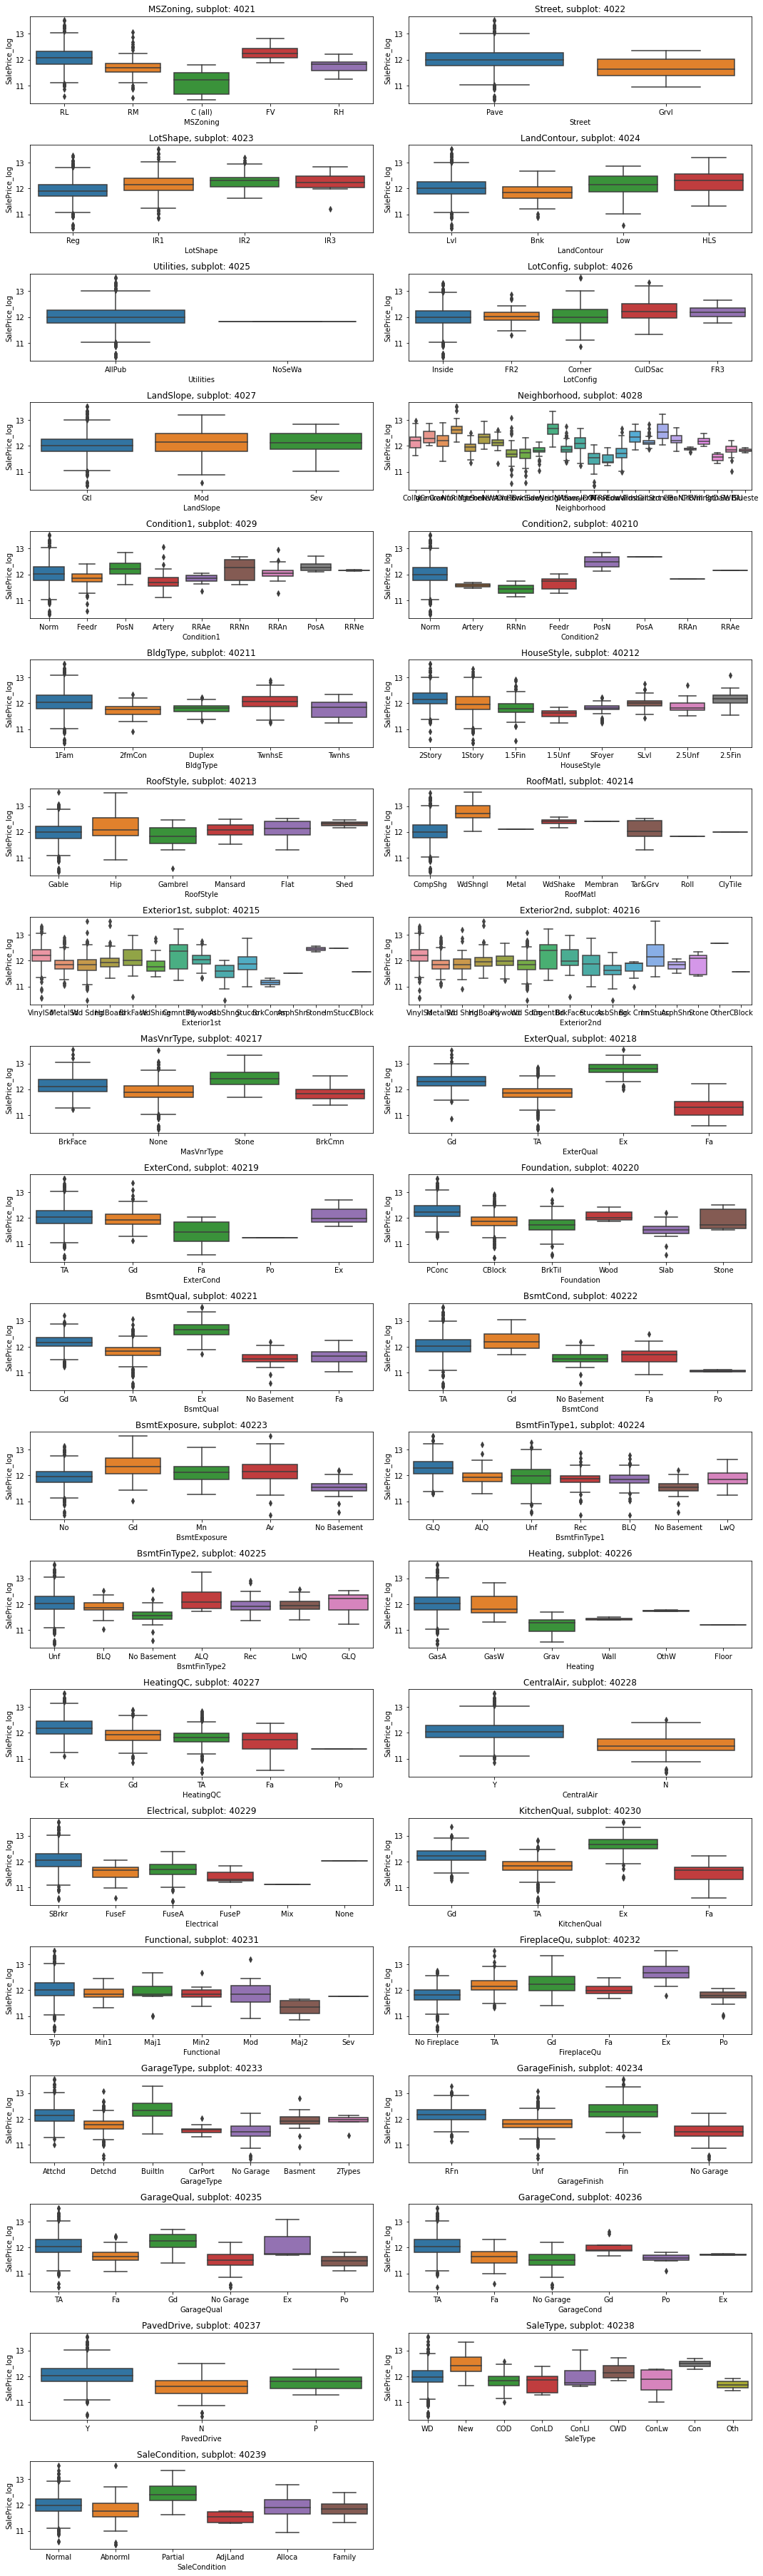

In [44]:
# Plotting the categorical variables against the target variables Salesprice_log
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in cat_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cat_df[i], cat_df['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

In [45]:
top_corr_cat_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                    'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [46]:
cat_df_f = cat_df[top_corr_cat_col]
cat_df_f.shape

(1460, 39)

## Encoding the categorical variables

In [47]:
cat_df_f = pd.get_dummies(cat_df_f, drop_first ='true')

In [48]:
cat_df_f.shape

(1460, 211)

In [49]:
cat_df_f.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Final Data Frame

In [50]:
df_total =  pd.concat([df_housing[['Id']],cat_df_f,num_data_f],axis=1)
df_total.shape

(1460, 250)

In [51]:
df_total.head()

,Id,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_log
0,1,0,0,1,0,1,0,0,1,0,...,0,61,0,0,0,0,0,2,2008,12.247694
1,2,0,0,1,0,1,0,0,1,0,...,298,0,0,0,0,0,0,5,2007,12.109011
2,3,0,0,1,0,1,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,12.317167
3,4,0,0,1,0,1,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,11.849398
4,5,0,0,1,0,1,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,12.429216


In [52]:
## Concludes the data preparation and now we have final dataset for model creation

 ## Model Building and Evaluation ##

In [53]:
X = df_total.drop('SalePrice_log',axis =1)
y = df_total.pop('SalePrice_log')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1460, 249)
y shape (1460,)


In [54]:
# Dropping column Id

X_Id = X[['Id']].copy()
X = X.drop('Id',axis = 1)
print('X shape',X.shape)

X shape (1460, 247)


## Train test split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =1)

In [57]:
print('X train shape',X_train.shape)
print('X test shape',X_train.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1022, 247)
X test shape (1022, 247)
y train shape (1022,)
y test shape (438,)


In [58]:
#Scaling of numerical variables

In [59]:
X_train.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
632,0,0,1,0,1,0,0,1,0,0,...,544,192,0,0,0,0,0,0,4,2009
208,0,0,1,0,1,0,0,0,0,1,...,454,60,55,0,0,154,0,0,4,2007
83,0,0,1,0,1,0,0,0,0,0,...,461,74,0,0,0,0,0,0,7,2007
1174,0,0,1,0,1,0,0,0,0,0,...,360,0,0,0,0,0,0,0,7,2006
250,0,0,1,0,1,0,0,0,0,0,...,0,263,0,0,0,0,0,450,5,2010


y_train.head()

In [60]:
y_train.head()

632     11.320554
208     12.531773
83      11.747998
1174    12.384219
250     11.245046
Name: SalePrice_log, dtype: float64

### Numerical Variables Scaling ###

In [61]:
# Numerical columns to be scaled

X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [62]:
numvars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [63]:
X_train[numvars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
632,20,85.0,11900,7,5,1977,1977,209.0,822,0,...,544,192,0,0,0,0,0,0,4,2009
208,60,69.0,14364,7,5,1988,1989,128.0,1065,0,...,454,60,55,0,0,154,0,0,4,2007
83,20,80.0,8892,5,5,1960,1960,66.0,0,0,...,461,74,0,0,0,0,0,0,7,2007
1174,70,80.0,16560,6,8,1932,1950,0.0,503,0,...,360,0,0,0,0,0,0,0,7,2006
250,30,55.0,5350,3,2,1940,1966,0.0,0,0,...,0,263,0,0,0,0,0,450,5,2010


In [64]:
X_train.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,0.040117,0.008806,0.794521,0.153620,0.997065,0.028376,0.005871,0.627202,0.026419,0.025440,...,473.224070,96.006849,46.465753,22.649706,3.475538,16.418787,2.256360,52.876712,6.268102,2007.840509
std,0.196331,0.093473,0.404249,0.360761,0.054126,0.166125,0.076434,0.483786,0.160456,0.157535,...,208.770806,124.454197,66.526793,62.938869,30.579530,57.386662,36.547379,585.673175,2.676583,1.326666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,320.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,480.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,576.000000,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1418.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [65]:
#Scaling using MinMax
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [66]:
X_train[numvars] = scaler.fit_transform(X_train[numvars])
X_test[numvars] = scaler.transform(X_test[numvars])

In [67]:
X_train.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,0.040117,0.008806,0.794521,0.153620,0.997065,0.028376,0.005871,0.627202,0.026419,0.025440,...,0.333726,0.130444,0.084947,0.041032,0.006842,0.034206,0.003057,0.003411,0.478918,0.460127
std,0.196331,0.093473,0.404249,0.360761,0.054126,0.166125,0.076434,0.483786,0.160456,0.157535,...,0.147229,0.169095,0.121621,0.114020,0.060196,0.119556,0.049522,0.037785,0.243326,0.331666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.225846,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.338505,0.000000,0.046618,0.000000,0.000000,0.000000,0.000000,0.000000,0.454545,0.500000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.406206,0.228261,0.120658,0.000000,0.000000,0.000000,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
X_train.shape

(1022, 247)

### Feature Selection using RFE ###

In [69]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [70]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train, y_train)

In [71]:
#Top predictors chosen by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSZoning_FV', False, 19),
 ('MSZoning_RH', False, 25),
 ('MSZoning_RL', False, 26),
 ('MSZoning_RM', False, 29),
 ('Street_Pave', False, 215),
 ('LotShape_IR2', False, 146),
 ('LotShape_IR3', False, 106),
 ('LotShape_Reg', False, 220),
 ('LandContour_HLS', False, 57),
 ('LandContour_Low', False, 205),
 ('LandContour_Lvl', False, 58),
 ('Utilities_NoSeWa', False, 39),
 ('LotConfig_CulDSac', False, 113),
 ('LotConfig_FR2', False, 196),
 ('LotConfig_FR3', False, 132),
 ('LotConfig_Inside', False, 189),
 ('LandSlope_Mod', False, 199),
 ('LandSlope_Sev', True, 1),
 ('Neighborhood_Blueste', False, 31),
 ('Neighborhood_BrDale', False, 33),
 ('Neighborhood_BrkSide', False, 129),
 ('Neighborhood_ClearCr', False, 202),
 ('Neighborhood_CollgCr', False, 127),
 ('Neighborhood_Crawfor', False, 2),
 ('Neighborhood_Edwards', False, 56),
 ('Neighborhood_Gilbert', False, 125),
 ('Neighborhood_IDOTRR', False, 128),
 ('Neighborhood_MeadowV', False, 35),
 ('Neighborhood_Mitchel', False, 103),
 ('Neighbo

In [72]:
# Top predictors
col = X_train.columns[rfe.support_]

In [73]:
col

Index(['LandSlope_Sev', 'Condition2_PosN', 'RoofStyle_Mansard',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Functional_Maj2', 'Functional_Sev',
       'SaleType_Con', 'SaleType_Oth', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageArea'],
      dtype='object')

In [95]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]


In [96]:
print(X_train_rfe.shape)
print(X_test_rfe.shape)

(1022, 25)
(438, 25)


In [103]:
lm1=lm.fit(X_train, y_train)

In [104]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

8.053019758263723
[ 3.15681479e-01  3.37745514e-01  2.89107201e-01  2.54309376e-01
 -3.98144475e-03  2.63716196e-02  6.00703083e-02 -7.13659581e-04
  5.78141970e-02 -1.02572730e-02  5.73264434e-02 -3.30038588e-01
  2.83998348e-02 -1.73033177e-02 -5.97319327e-02 -1.39587744e-02
  1.04613104e-02 -2.03622451e-01 -1.25839547e-01 -1.18760411e-01
 -6.22693988e-02 -1.01147480e-02 -6.48528134e-02  6.65192946e-02
 -1.43581169e-01 -5.87111502e-02 -8.68407869e-02 -2.29817618e-01
 -9.40692655e-02 -1.12409573e-01 -5.75644303e-02 -9.18237838e-02
 -1.71459039e-02  4.97830653e-02 -1.10559653e-01 -7.21157493e-02
 -9.35185640e-02 -3.73317007e-02 -3.82727448e-02  1.33042433e-01
 -3.73926346e-02 -2.81688030e-02  5.66761559e-02  1.07201877e-01
  4.86272612e-02  1.22731089e-01 -5.64267259e-03  9.94912844e-02
  2.91692068e-02  1.32628967e-01  1.72452021e-02 -3.48692371e-02
  1.31393514e-01 -8.95943712e-01  8.41754031e+09  6.34118819e+09
 -4.88745396e-02  8.36924289e-02  1.70578231e-02 -3.13082034e-02
 -1.447

In [105]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [106]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8932637772379779
0.7110764047328502
15.986099031975321
23.91634331011801
0.015641975569447478
0.05460352353908221


* As r2 for test and train differ by significant i.e. for train it is .89 and for test its .71 this is clear case 
* of overfitting. We will try regularization on the model using ridge and lasso

### Ridge and Lasso Regression ###

In [107]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

### Ridge ###

In [108]:
# list of alphas to tune
params = {'alpha': [0.0001,0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 0.2}
-0.1006611365766735


In [154]:
#Fitting Ridge model for alpha = 0.2 and printing coefficients which have been penalised
alpha = 0.4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train1, y_train)
ridge.coef_

array([-0.01056908, -0.72699091,  0.17403587,  0.84482075,  0.76875442,
        0.64623253,  0.83219992,  0.4914645 ,  0.83774303, -0.47902725,
       -0.22606223, -0.33372068,  0.14725699,  0.19356317,  0.54834706,
        0.81708661,  0.33570667,  0.4514461 ,  0.26549236,  0.30679501,
        0.76511698,  0.20951591,  0.72393316, -0.23103387,  0.34670648])

In [155]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8617022445421668
0.8579043642500717
20.71313334347698
11.762306932123236
0.020267253760740685
0.026854582036811042


R2 square for test and train are similar now i.e. 87% and 84%

## Lasso ##

In [112]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [113]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.10164072086991005


In [156]:
#Fitting lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = .0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 
lasso.coef_

array([-0.00857759, -0.80754946,  0.13489035,  1.50626477,  1.53171602,
        1.35995515,  1.49158615,  1.16379347,  1.49993125, -0.46443349,
       -0.20654635, -0.26654848,  0.07062118,  0.12263772,  0.5556517 ,
        0.8044767 ,  0.33580369,  0.45336275,  0.3224369 ,  0.3258364 ,
        0.43843652,  0.05171112,  1.21061688, -0.22799406,  0.33262963])

In [157]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8754522735389246
0.8406280679710552
18.653763810373054
13.192393777589164
0.01825221507864291
0.030119620496778913


In [158]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.893264,0.861702,0.875452
1,R2 Score (Test),0.711076,0.857904,0.840628
2,RSS (Train),15.986099,20.713133,18.653764
3,RSS (Test),23.916343,11.762307,13.192394
4,MSE (Train),0.125068,0.142363,0.135101
5,MSE (Test),0.233674,0.163874,0.173550


### Lets observe change after regularization ###

In [159]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [160]:
betas.rows = X_train_rfe.columns

In [161]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [128]:
pd.set_option('display.max_rows', None)
betas.head(25)

,Ridge,Lasso
LandSlope_Sev,-0.074678,-0.153712
Condition2_PosN,-0.826151,-0.919670
RoofStyle_Mansard,0.186957,0.148929
RoofMatl_CompShg,1.290070,2.351144
RoofMatl_Membran,1.309691,2.597961
RoofMatl_Roll,1.126455,2.305459
RoofMatl_Tar&Grv,1.293549,2.373347
RoofMatl_WdShake,0.922720,2.031135
RoofMatl_WdShngl,1.276939,2.334264
Exterior1st_BrkComm,-0.557752,-0.566690


Below are key predictors for the housing price:

1. LotArea   - Lot size in square feet
2. OverallQual - Rates the overall material and finish of the house
3. OverallCond - Rates the overall condition of the house
4. YearBuilt - Original construction date 
5. BsmtFinSF1 - Type 1 finished square feet
6. 1stFlrSF - First Floor square feet

### Removing the top 5 predictors and check the new top predictors ###

In [162]:
X_train_rfe

,LandSlope_Sev,Condition2_PosN,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,...,OverallQual,OverallCond,YearBuilt,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,GarageArea
632,0,0,0,1,0,0,0,0,0,0,...,0.666667,0.428571,0.760870,0.145641,0.226841,0.247132,0.000000,0.202901,0.5,0.383639
208,0,0,0,1,0,0,0,0,0,0,...,0.666667,0.428571,0.840580,0.188696,0.189362,0.194126,0.471154,0.325546,0.5,0.320169
83,0,0,0,1,0,0,0,0,0,0,...,0.444444,0.428571,0.637681,0.000000,0.174304,0.167737,0.000000,0.137717,0.5,0.325106
1174,0,0,0,1,0,0,0,0,0,0,...,0.555556,0.857143,0.434783,0.089121,0.155810,0.191831,0.627671,0.378862,0.5,0.253879
250,0,0,0,1,0,0,0,0,0,0,...,0.222222,0.000000,0.492754,0.000000,0.119149,0.223038,0.000000,0.183120,0.5,0.000000
895,0,0,0,1,0,0,0,0,0,0,...,0.555556,0.428571,0.659420,0.070872,0.127660,0.148922,0.434295,0.275433,0.5,0.340621
76,0,0,0,1,0,0,0,0,0,0,...,0.333333,0.714286,0.608696,0.040397,0.155810,0.141808,0.000000,0.116428,0.5,0.199577
228,0,0,0,1,0,0,0,0,0,0,...,0.444444,0.428571,0.688406,0.149185,0.149264,0.132630,0.000000,0.108892,0.5,0.236953
480,0,0,0,1,0,0,0,0,0,0,...,0.888889,0.428571,0.956522,0.223423,0.300000,0.347866,0.000000,0.285607,0.5,0.544429
577,0,0,0,1,0,0,0,0,0,0,...,0.444444,0.571429,0.681159,0.058115,0.190507,0.226251,0.000000,0.185757,0.5,0.397743


In [167]:
y_train

632     11.320554
208     12.531773
83      11.747998
1174    12.384219
250     11.245046
895     11.849398
76      11.818570
228     11.736069
480     12.694653
577     12.010666
1048    11.652687
536     12.144197
1130    11.813030
1339    11.763684
870     11.603680
892     11.947949
1446    11.969717
746     12.371587
439     11.608236
419     11.863582
713     11.767568
1127    12.464583
1447    12.388394
323     11.745425
1424    11.877569
1309    12.096258
719     11.763684
602     12.301383
1008    12.388394
899     11.813030
654     12.765688
200     11.849398
349     12.988041
1250    12.404924
823     11.845820
1445    11.767568
902     12.100712
1213    11.884489
1089    12.190959
1115    12.669807
825     12.860999
937     12.441145
1387    11.820410
764     12.506177
355     12.086726
547     11.771436
1293    12.000892
452     12.225875
1292    11.585246
211     12.133502
180     12.083905
1166    12.410441
395     11.767568
244     12.230765
771     11.532728
274     11

In [168]:
X_train_rfe.columns

Index(['LandSlope_Sev', 'Condition2_PosN', 'RoofStyle_Mansard',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Functional_Maj2', 'Functional_Sev',
       'SaleType_Con', 'SaleType_Oth', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageArea'],
      dtype='object')

In [170]:
# Dropping top 5 predictors for lasso

X_train_new = X_train_rfe.drop(['RoofMatl_CompShg','OverallQual','OverallCond','YearBuilt','BsmtFinSF1'],axis = 1)
X_test_new = X_test_rfe.drop(['RoofMatl_CompShg','OverallQual','OverallCond','YearBuilt','BsmtFinSF1'], axis = 1)



In [171]:
X_train_new.head()

,LandSlope_Sev,Condition2_PosN,RoofStyle_Mansard,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Functional_Maj2,Functional_Sev,SaleType_Con,SaleType_Oth,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,GarageArea
632,0,0,0,0,0,0,0,0,0,0,0,0,0,0.049545,0.226841,0.247132,0.000000,0.202901,0.5,0.383639
208,0,0,0,0,0,0,0,0,0,0,0,0,0,0.061062,0.189362,0.194126,0.471154,0.325546,0.5,0.320169
83,0,0,0,0,0,0,0,0,0,0,0,0,0,0.035486,0.174304,0.167737,0.000000,0.137717,0.5,0.325106
1174,0,0,0,0,0,0,0,0,0,0,0,0,0,0.071327,0.155810,0.191831,0.627671,0.378862,0.5,0.253879
250,0,0,0,0,0,0,0,0,0,0,0,0,0,0.018930,0.119149,0.223038,0.000000,0.183120,0.5,0.000000


In [172]:
X_test_new.head()

,LandSlope_Sev,Condition2_PosN,RoofStyle_Mansard,RoofMatl_Membran,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Functional_Maj2,Functional_Sev,SaleType_Con,SaleType_Oth,LotArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,KitchenAbvGr,GarageArea
258,0,0,0,0,0,0,0,0,0,0,0,0,0,0.052046,0.157610,0.144332,0.442842,0.274680,0.5,0.397743
267,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033186,0.117840,0.164754,0.384615,0.350038,0.5,0.169252
288,0,0,0,0,0,0,0,0,0,0,0,0,0,0.039819,0.144354,0.129876,0.000000,0.106631,0.5,0.197461
649,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002973,0.103110,0.067921,0.000000,0.055765,0.5,0.000000
1233,0,0,0,0,0,0,0,0,0,0,0,0,0,0.050761,0.194435,0.195961,0.000000,0.160889,0.5,0.374471


### LASSO ##

In [174]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train_new, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [176]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 0.0001}
-0.14620262395285386


In [177]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
lasso.coef_



array([ 5.00010782e-03, -7.69616971e-01, -1.14960264e-01,  2.33014930e-01,
        0.00000000e+00,  1.08073394e-03, -1.79788664e-03,  8.92409042e-02,
       -8.34312758e-01, -4.34520133e-01, -5.45156348e-01,  2.69807617e-01,
        1.44590387e-01,  1.16198507e-01,  1.17012225e+00,  1.48514615e+00,
        6.52154785e-01,  0.00000000e+00, -6.45944211e-01,  7.84409683e-01])

In [178]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)


r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)


mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)


0.7101617309002308
0.7198639623972174
43.40966124888796
23.18893215574642
0.04247520670145593
0.05294276747887311


In [179]:
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(25)

,Lasso
LandSlope_Sev,0.005000
Condition2_PosN,-0.769617
RoofStyle_Mansard,-0.114960
RoofMatl_Membran,0.233015
RoofMatl_Roll,0.000000
RoofMatl_Tar&Grv,0.001081
RoofMatl_WdShake,-0.001798
RoofMatl_WdShngl,0.089241
Exterior1st_BrkComm,-0.834313
Functional_Maj2,-0.434520


In [ ]:
Top Predictors after removing top5 predictors:

    1. TotalBsmtSF
    2. 1stFlrSF
    3. GarageArea
    4. 2ndFlrSF
    5. SaleType_Con
